In [66]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()


In [67]:
file_to_save = r"~/Downloads/stock_price.csv"
df = pd.read_csv(file_to_save)
# Sort DataFrame by date


df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Volume'] = df['Volume'].str.replace('M', 'e6').str.replace('B', 'e9').astype(float)
df['Change'] = df['Change'].str.replace('%', '').astype(float)

# Double check the result
df.head()


,Date,Close,Open,High,Low,Volume,Change
9201,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25
9200,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43
9199,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74
9198,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93
9197,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82


In [68]:
df.isnull().sum()


Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [69]:
df.iloc[0::].describe()  # Get stats for the first 3 rows


,Date,Close,Open,High,Low,Volume,Change
count,9202,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03,9202.000000
mean,2005-10-21 08:44:04.642468992,92.180961,92.256183,93.176451,91.330146,1.726677e+08,0.017502
min,1987-02-12 00:00:00,33.000000,33.000000,33.200000,32.200000,9.340000e+06,-14.740000
25%,1996-06-06 06:00:00,52.000000,52.100000,52.800000,51.500000,8.073000e+07,-0.940000
50%,2005-10-11 12:00:00,85.100000,85.100000,86.050000,84.200000,1.540150e+08,0.000000
75%,2015-03-04 18:00:00,110.800000,110.800000,111.900000,109.275000,2.305225e+08,0.900000
max,2024-08-01 00:00:00,305.900000,309.800000,311.800000,303.900000,1.280000e+09,16.250000
std,NaN,50.452228,50.598215,51.049837,50.087405,1.251280e+08,1.876667


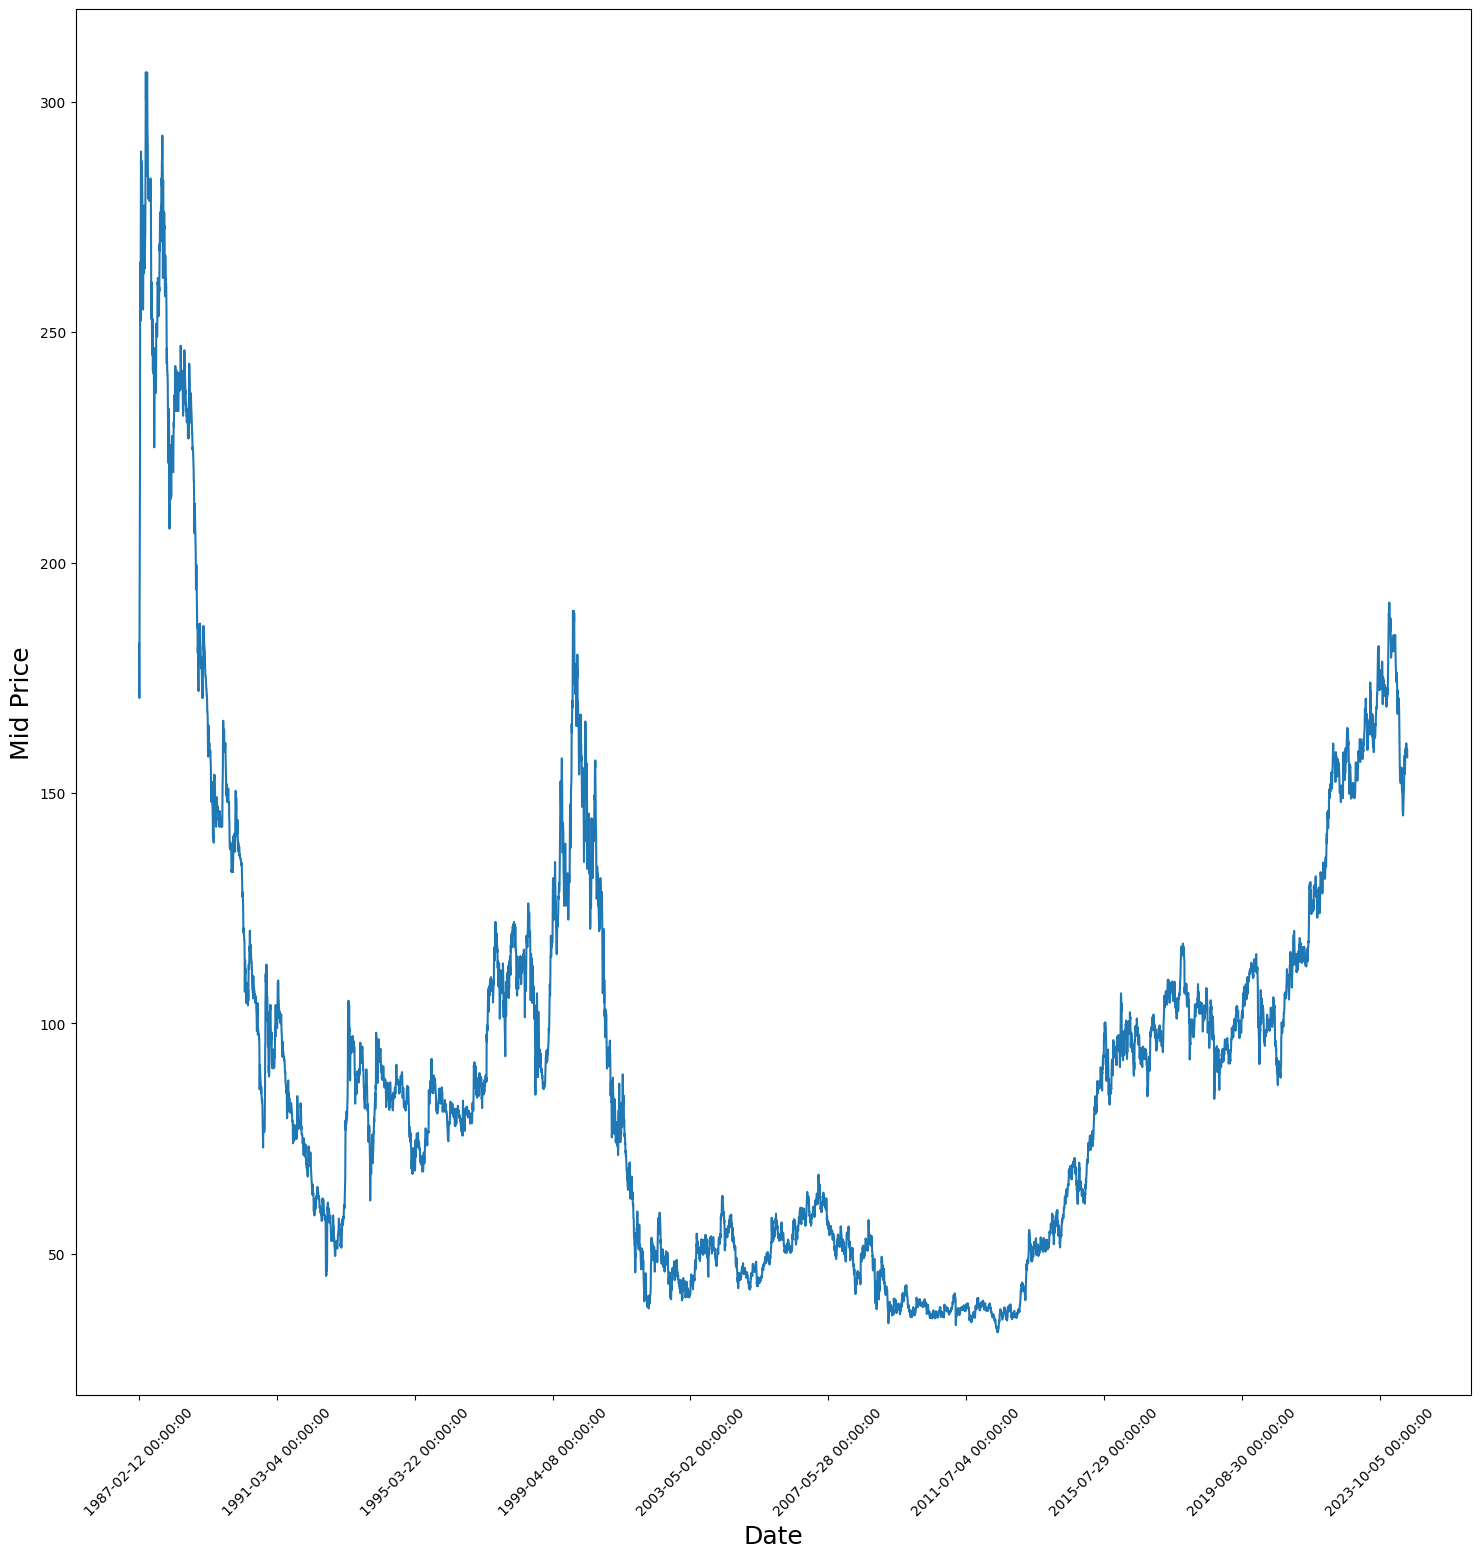

In [70]:
plt.figure(figsize = (18,18))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],1000),df['Date'].loc[::1000],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [71]:
mid_prices = df[['Low', 'High']].mean(axis=1).values.reshape(-1, 1)
print(mid_prices)
# Assuming mid_prices is your data array
split_index = int(len(mid_prices) * 0.8)  # Calculate the index for 80% split

# Split the data
train_data = mid_prices[:split_index]  # First 80% for training
test_data = mid_prices[split_index:] 
print(len(train_data))
print(test_data)
len(test_data)

[[182.4 ]
 [174.5 ]
 [170.6 ]
 ...
 [158.6 ]
 [159.4 ]
 [157.75]]
7361
[[100.2 ]
 [ 99.8 ]
 [100.45]
 ...
 [158.6 ]
 [159.4 ]
 [157.75]]


1841

In [72]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

print(train_data)
print(test_data)

[[182.4 ]
 [174.5 ]
 [170.6 ]
 ...
 [ 99.5 ]
 [101.85]
 [101.9 ]]
[[100.2 ]
 [ 99.8 ]
 [100.45]
 ...
 [158.6 ]
 [159.4 ]
 [157.75]]


In [73]:
total_len = len(mid_prices)
print(train_data)
print(test_data)
smoothing_window_size=2454
for di in range(0, total_len, smoothing_window_size):
    # Get the current chunk of data
    end_idx = min(di + smoothing_window_size, total_len)
    
    if end_idx > di:  # Ensure this chunk is not empty
        scaler.fit(mid_prices[di:end_idx])
        mid_prices[di:end_idx] = scaler.transform(mid_prices[di:end_idx])


print(train_data)
print(test_data)

print(len(train_data))
print(len(test_data))


[[182.4 ]
 [174.5 ]
 [170.6 ]
 ...
 [ 99.5 ]
 [101.85]
 [101.9 ]]
[[100.2 ]
 [ 99.8 ]
 [100.45]
 ...
 [158.6 ]
 [159.4 ]
 [157.75]]
[[0.52526799]
 [0.49502297]
 [0.48009188]
 ...
 [0.90482665]
 [0.9367777 ]
 [0.93745751]]
[[0.91434398]
 [0.15041783]
 [0.15645311]
 ...
 [0.69637883]
 [0.70380687]
 [0.68848654]]
7361
1841


In [74]:
# Reshape both train and test data
train_data = train_data.reshape(-1)
test_data = test_data.reshape(-1)
print(train_data)
print(test_data)

# Normalize test data
#test_data = scaler.transform(test_data).reshape(-1)

[0.52526799 0.49502297 0.48009188 ... 0.90482665 0.9367777  0.93745751]
[0.91434398 0.15041783 0.15645311 ... 0.69637883 0.70380687 0.68848654]


In [75]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)
print(train_data)
print(test_data)

[0.0525268  0.09677642 0.13510796 ... 0.89673139 0.90073602 0.90440817]
[0.91434398 0.15041783 0.15645311 ... 0.69637883 0.70380687 0.68848654]


In [76]:
window_size = 70
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))
std_avg_predictions[-10::]

MSE error for standard averaging: 0.00113


[0.8103046560075485,
 0.8112223306418135,
 0.8121764304901309,
 0.8131584572478577,
 0.8141491085610442,
 0.8151475219741443,
 0.8161606905303476,
 0.8172046195349996,
 0.8182529251837141,
 0.8193605257409956]

In [77]:
y_min = min(np.min(all_mid_data), np.min(std_avg_predictions))
y_max = max(np.max(all_mid_data), np.max(std_avg_predictions))

print("Y-axis range: ", (y_min, y_max))


Y-axis range:  (0.0, 1.0)


In [78]:
range(df.shape[0])

range(0, 9202)

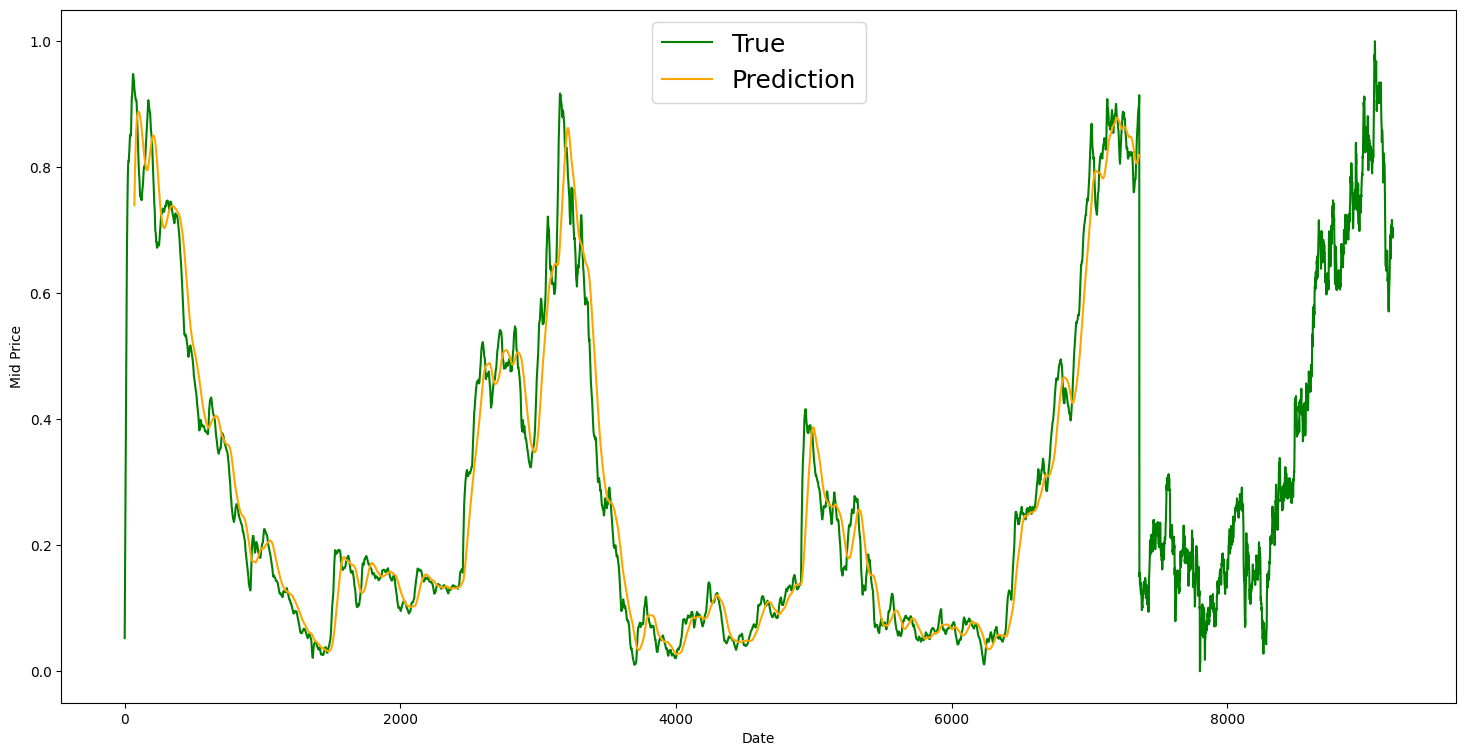

In [79]:

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='g',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()



In [80]:
print("Last few values of train_data:", train_data[-10:])
print("Last few values of std_avg_predictions:", std_avg_predictions[-10:])


Last few values of train_data: [0.87777832 0.88286249 0.88750622 0.88985009 0.89195957 0.8946059
 0.89583192 0.89673139 0.90073602 0.90440817]
Last few values of std_avg_predictions: [0.8103046560075485, 0.8112223306418135, 0.8121764304901309, 0.8131584572478577, 0.8141491085610442, 0.8151475219741443, 0.8161606905303476, 0.8172046195349996, 0.8182529251837141, 0.8193605257409956]


In [81]:
window_size = 70
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for EMA averaging: 0.00002


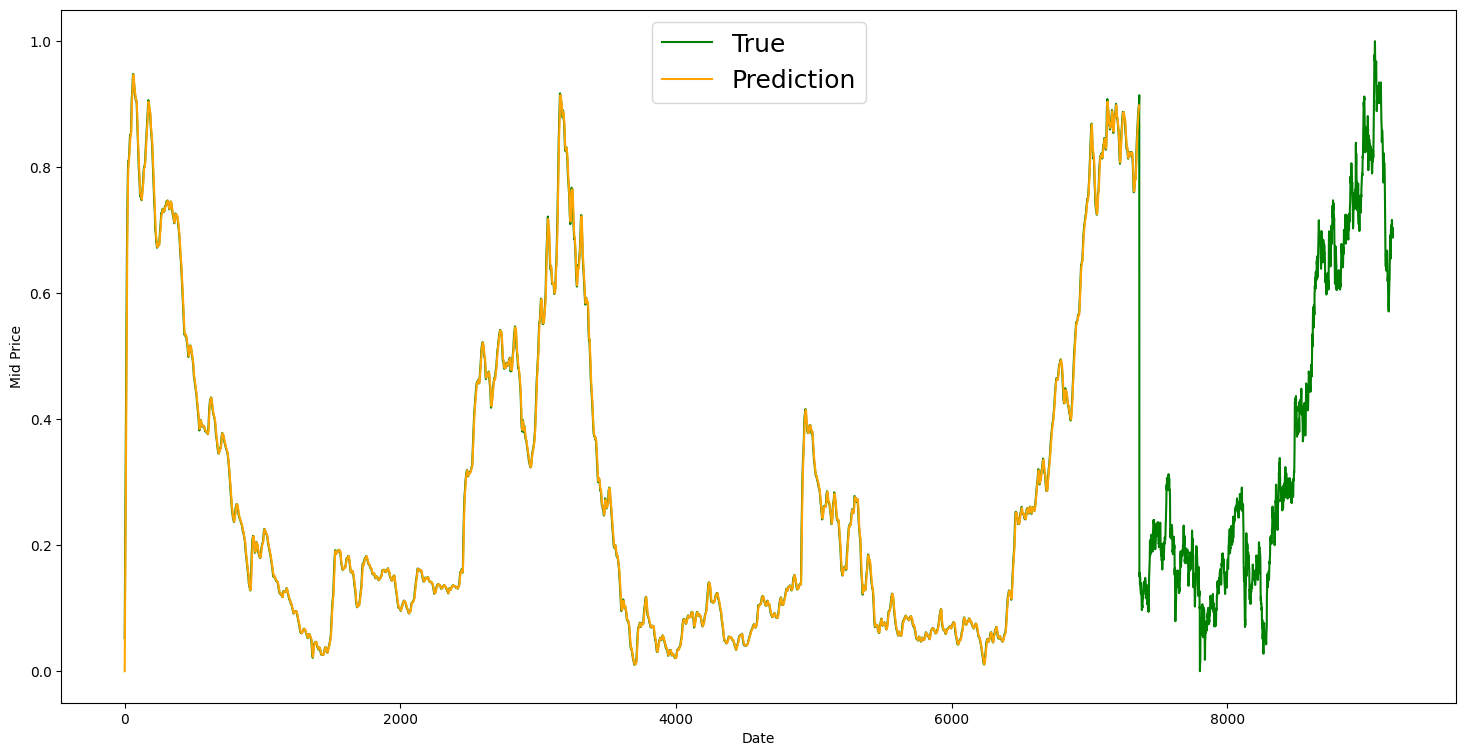

In [82]:

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='g',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [83]:

class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)




Unrolled index 0
	Inputs:  [0.0525268  0.02920415 0.3245147  0.04961928 0.05983486]

	Output: [0.21080805 0.03180238 0.3245147  0.04916454 0.06044558]


Unrolled index 1
	Inputs:  [0.09677642 0.03018879 0.32406452 0.04937994 0.06003764]

	Output: [0.09677642 0.03180238 0.32402688 0.04937994 0.06003764]


Unrolled index 2
	Inputs:  [0.13510796 0.03180238 0.32372546 0.04916454 0.06028813]

	Output: [0.17316684 0.03180238 0.32372546 0.04773939 0.06115932]


Unrolled index 3
	Inputs:  [0.17316684 0.03331203 0.32365146 0.04864042 0.06044558]

	Output: [0.28375605 0.0344793  0.3235188  0.04773939 0.06115932]


Unrolled index 4
	Inputs:  [0.21080805 0.0344793  0.3235188  0.04773939 0.0609272 ]

	Output: [0.37550282 0.0353767  0.32547492 0.04522441 0.06255741]


In [84]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

tf.compat.v1.reset_default_graph() # This is important in case you run this multiple times


In [85]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.compat.v1.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.compat.v1.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))


In [86]:
import tensorflow as tf

# Define a function to create an LSTM layer
def build_lstm_layers(num_nodes, dropout, n_layers):
    lstm_cells = []
    for li in range(n_layers):
        lstm = tf.keras.layers.LSTM(
            units=num_nodes[li],
            return_sequences=(li < n_layers - 1),  # Return sequences for all layers except the last
            dropout=dropout
        )
        lstm_cells.append(lstm)
    return lstm_cells

# # Example configuration
# num_nodes = [128, 64]  # Example number of nodes per layer
# dropout = 0.2  # Dropout rate
# n_layers = 2  # Number of layers

# Build LSTM layers
lstm_cells = build_lstm_layers(num_nodes, dropout, n_layers)

# Example of stacking LSTM layers
model = tf.keras.Sequential(lstm_cells)
model.add(tf.keras.layers.Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define weights and biases
w = tf.Variable(tf.random.normal([num_nodes[-1], 1]), name='w')
b = tf.Variable(tf.random.uniform([1], -0.1, 0.1), name='b')


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.007
# with tf.control_dependencies([tf.compat.v1.assign(c[li], state[li][0]) for li in range(n_layers)]+
#                              [tf.compat.v1.assign(h[li], state[li][1]) for li in range(n_layers)]):
#   for ui in range(num_unrollings):
#     loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.compat.v1.assign(global_step,global_step + 1)
tf_learning_rate = tf.compat.v1.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.compat.v1.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.compat.v1.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate)
# gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
# optimizer = optimizer.apply_gradients(
    # zip(gradients, v))

print('\tAll done')


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [ ]:
import tensorflow as tf

# # Parameters
# batch_size = 32
# timesteps = 10
# input_dim = 5
# num_nodes = [64, 32]  # Example: 2 layers with different numbers of units
# n_layers = len(num_nodes)

# Create input layer
inputs = tf.keras.Input(shape=(timesteps, input_dim))

# Initialize states
initial_states = []
x = inputs

# Define LSTM layers
for li in range(n_layers):
    lstm_layer = tf.keras.layers.LSTM(
        units=num_nodes[li],
        return_sequences=True if li < n_layers - 1 else False,
        return_state=True,
        recurrent_initializer='glorot_uniform'
    )
    
    if li == 0:
        # For the first layer, we don't have previous states
        x, state_h, state_c = lstm_layer(x)
    else:
        print("ignore")
        # For subsequent layers, we pass the previous states
        #x, state_h, state_c = lstm_layer(x, initial_state=[initial_states[li-1][0], initial_states[li-1][1]])

    # Store the current states
    initial_states.append((state_h, state_c))

# The final output from the last LSTM layer
final_output = x  # The output from the last layer

# Output layer
w = tf.keras.layers.Dense(1, kernel_initializer='glorot_uniform', name='w')(final_output)
b = tf.keras.layers.Dense(1, kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), name='b')(final_output)

# Final output calculation
all_outputs = w + b

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=all_outputs)

# Compile the model (example)
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


ignore
ignore
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 5)]              0         []                            
                                                                                                  
 lstm_3 (LSTM)               [(None, 10, 200),            164800    ['input_1[0][0]']             
                              (None, 200),                                                        
                              (None, 200)]                                                        
                                                                                                  
 w (Dense)                   (None, 10, 1)                201       ['lstm_3[0][0]']              
                                                                                

In [ ]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.compat.v1.InteractiveSession()

tf.compat.v1.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(11000,12000,50).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        #_, l = session.run([optimizer, loss], feed_dict=feed_dict)
        l = 0.005

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          tr_i = min(tr_i, 9201)
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          #_ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[9201]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          #pred = session.run(sample_prediction,feed_dict=feed_dict)

        #   our_predictions.append(np.asscalar(pred))

        #   feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*0.87**2

        #session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')


Initialized


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  'An interactive session is already active. This can cause'


Average loss at step 1: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 2: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 3: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 4: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 5: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 6: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 7: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 8: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 9: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 10: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 11: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 12: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 13: 0.005000
	Test MSE: 0.37845
	Finished Predictions
Average loss at step 14: 0.005000


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

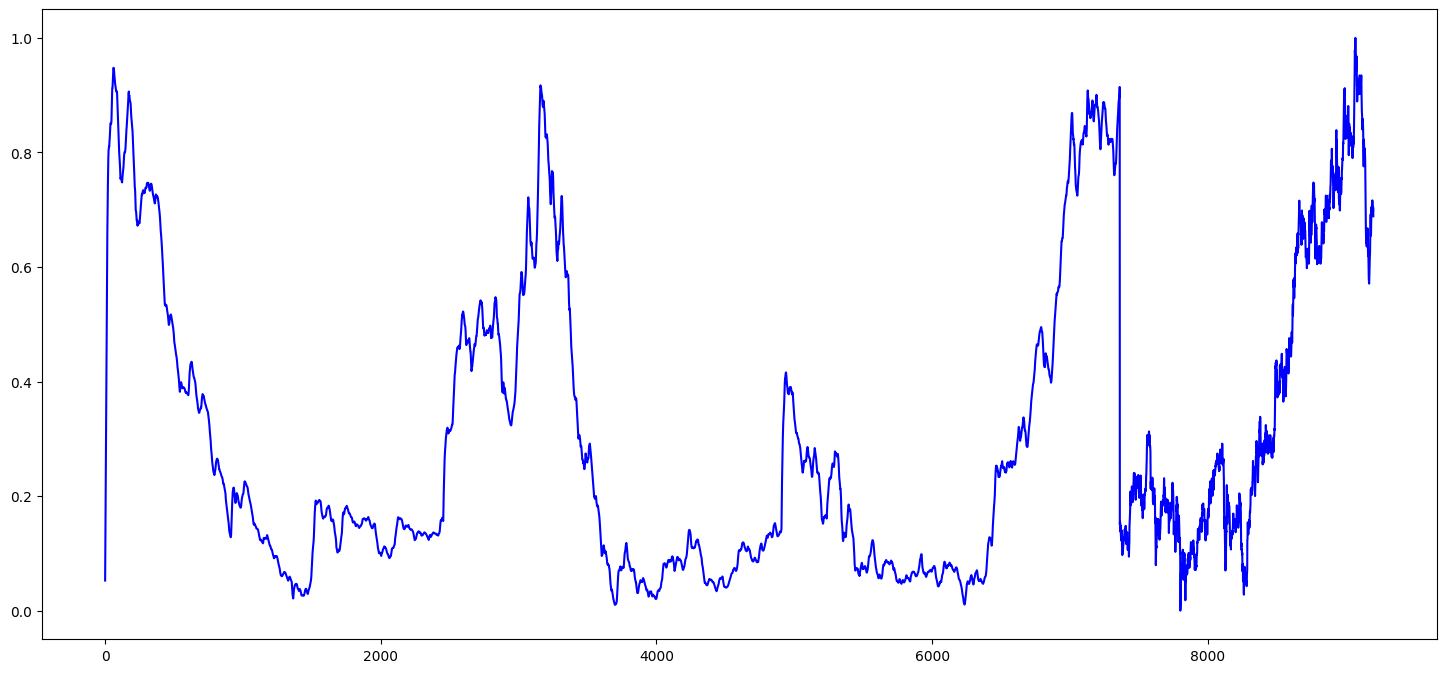

In [ ]:
best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(7362,9202)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(7362,9202)
plt.show()
